<a href="https://colab.research.google.com/github/fedhere/DSPS_FBianco/blob/main/HW3/KS_earthquakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Authors: Federica B Bianco @fedhere, Christian Munley @chrismun, UDel
# Kolmogorov Smirnoff test application to earthquake data

In [68]:
from __future__ import print_function, division
import pandas as pd
import pylab as pl
import scipy as sp
from scipy import stats
from scipy.stats import ks_2samp

%pylab inline

Populating the interactive namespace from numpy and matplotlib


We will reproduce the work in [Corral 2018](https://arxiv.org/pdf/0910.0055.pdf) which is well described, but not "reproducible".
Corral 2018 uses a K-S test to show that at different magnitude scales the time gaps between earthquakes follows the same distribution. If true, this indicates that there is a consistent scaling law.

The argument is a little convoluted, but it is a somewhat innovative use of the test. Corall compares the time gap between earthquakes  greater than a certain magnitude threshold with the time gaps between earthquakes above a different threshold, and finds no differences.




**The Null Hypothesis the K-S test tests is that the two distributions are the same type of distribution, same parent distribution.**


**The statistic of pivotal quantity used in the K-S test is the maxiumum distance between the two cumulative distribution functions (cdfs).**


**The probability distribution of the statistic depends on the sample size and the underlying cdfs, affecting the distance between them.**
    

# Data Retrival

The first reason why the paper is not techincally _reproducible_ is that, while a link is provided to retrieve the data, the link is dead. This happens often. Services like [Zenodo](https://zenodo.org/) or journals that serve data provide some insurance against this but unfortunately the standards are not strict.

You can retrieve the data yourself from [this website](http://service.scedc.caltech.edu/eq-catalogs/poly.php).

# Data Ingestion

## read in data

In [69]:
eqdata = pd.read_csv('earthquakes_CM.csv', sep=' ')

In [70]:
eqdata.shape

(70798, 34)

In [71]:
eqdata.head()

,#YYY/MM/DD,HH:mm:SS.ss,ET,GT,MAG,Unnamed: 5,M,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Q,Unnamed: 25,EVID,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,NaN,l,2.02,c,NaN,NaN,33.246,...,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1984/01/01,05:31:34.16,eq,NaN,l,2.12,c,NaN,NaN,32.945,...,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1984/01/01,06:59:05.14,eq,NaN,l,2.43,c,NaN,NaN,33.343,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1984/01/01,11:10:25.29,eq,NaN,l,2.07,c,NaN,NaN,33.668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1984/01/01,19:38:19.79,eq,NaN,l,2.13,c,NaN,NaN,33.963,...,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
eqdata.describe()

,GT,Unnamed: 5,Unnamed: 7,Unnamed: 8,Unnamed: 9,LAT,Unnamed: 11,Unnamed: 12,Unnamed: 15,Unnamed: 16,...,Q,Unnamed: 25,EVID,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,NPH,NGRM
count,0.0,70798.000000,0.0,0.0,70798.000000,70798.00000,0.0,9648.000000,7.359000e+03,4.628900e+04,...,3387.000000,469.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,2.417826,NaN,NaN,33.977749,-116.88145,NaN,13.354343,6.097558e+06,4.482677e+06,...,43.415412,14.746269,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.407683,NaN,NaN,1.156586,1.07667,NaN,2.724517,4.441852e+06,3.130379e+06,...,24.266088,17.013243,2.828427,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2.000000,NaN,NaN,30.094830,-121.76000,NaN,10.000000,1.000432e+06,1.070000e+02,...,0.000000,0.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.120000,NaN,NaN,33.061000,-117.69200,NaN,11.200000,3.041641e+06,3.031237e+06,...,24.000000,0.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.300000,NaN,NaN,34.056750,-116.59000,NaN,12.800000,3.229114e+06,3.110080e+06,...,38.000000,13.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2.590000,NaN,NaN,34.591000,-116.25100,NaN,14.900000,9.669999e+06,9.027968e+06,...,61.000000,24.000000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,7.100000,NaN,NaN,37.985500,-113.71900,NaN,29.300000,3.736673e+07,9.875061e+06,...,145.000000,88.000000,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## prepare date-time column

In [73]:
eqdata = eqdata.rename(columns={"#YYY/MM/DD": "date", "HH:mm:SS.ss": "time", "Unnamed: 5": "mag"})
eqdata = eqdata[["date", "time", "mag"]]

In [74]:
eqdata.head()

,date,time,mag
0,1984/01/01,01:30:57.52,2.02
1,1984/01/01,05:31:34.16,2.12
2,1984/01/01,06:59:05.14,2.43
3,1984/01/01,11:10:25.29,2.07
4,1984/01/01,19:38:19.79,2.13


In [75]:
eqdata.describe()

,mag
count,70798.000000
mean,2.417826
std,0.407683
min,2.000000
25%,2.120000
50%,2.300000
75%,2.590000
max,7.100000


Combine the columns containing date and time and convert them to a "datetime" kind of data object:


In [76]:
eqdata.time.dtype, eqdata.date.dtype

(dtype('O'), dtype('O'))

In [77]:
# Fix seconds ending in 60
mask = eqdata['time'].str.endswith('60.00')
eqdata.loc[mask, 'time'] = eqdata['time'].str.slice(stop=-5) + '59.99'
eqdata['datetime'] = pd.to_datetime(eqdata['date'] + ' ' + eqdata['time'])

In [78]:
eqdata.head()

,date,time,mag,datetime
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790


## select valuable data

Following the description in Section 2  of Corral 2018 I removed all data that did not belong to a "stationary" period. Third paragraph section 2 of Corral 2018.

In [79]:
to_datetime = lambda y: pd.to_datetime(int(y), format="%Y") + pd.Timedelta(f"{(y - int(y)) * 365.25:.0f} days")
ss = list(map(lambda t: (to_datetime(t[0]), to_datetime(t[1])),
              [(1984, 1986.5), (1990.3, 1992.1), (1994.6, 1995.6), (1996.1,1996.5),
               (1997,1997.6), (1997.75,1998.15), (1998.25,1999.35), (2000.55,2000.8),
               (2000.9 ,2001.25), (2001.6 ,2002), (2002.5 ,2003)]))

In [80]:
print ("the {} timestamp pairs that are the boundaries of good data periods are:".format(len(ss)))


the 11 timestamp pairs that are the boundaries of good data periods are:


In [81]:
gooddates = sum((eqdata.datetime >= start) & (eqdata.datetime <= end) for start, end in ss).values.astype(bool)

<ipython-input-81-b3808e327e75>:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  gooddates = sum((eqdata.datetime >= start) & (eqdata.datetime <= end) for start, end in ss).values.astype(bool)


In [82]:
print ("there are {} earthquakes falling in the selected stationary periods".
       format(gooddates.sum()))

there are 18852 earthquakes falling in the selected stationary periods


In [83]:
eqGoodData = eqdata[gooddates]

In [84]:
eqGoodData.shape

(18852, 4)

In [85]:
eqGoodData.head()

,date,time,mag,datetime
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790


Getting the time between consecutive earthquakes, in 'gaps'

In [88]:
eqGoodData['gaps'] = eqGoodData.datetime.diff().values.astype(float)

In [89]:
eqGoodData.shape

(18852, 5)

In [90]:
eqGoodData.head()

,date,time,mag,datetime,gaps
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520,-9.223372e+18
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160,1.443664e+13
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140,5.250980e+12
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290,1.508015e+13
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790,3.047450e+13


In [91]:
eqGoodData.describe()

,mag,gaps
count,18852.000000,1.885200e+04
mean,2.399488,-4.574501e+14
std,0.392436,6.718482e+16
min,2.000000,-9.223372e+18
25%,2.110000,2.736622e+12
50%,2.290000,8.946950e+12
75%,2.570000,2.133966e+13
max,5.800000,1.199632e+17


Note that the first entry will be NaT which is Not a Time We remove it:

In [92]:
eqGoodData = eqGoodData.iloc[1:]

In [93]:
eqGoodData.head()

,date,time,mag,datetime,gaps
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160,1.443664e+13
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140,5.250980e+12
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290,1.508015e+13
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790,3.047450e+13
5,1984/01/01,19:39:19.67,2.13,1984-01-01 19:39:19.670,5.988000e+10


# data exploration
Visualize the distribution:

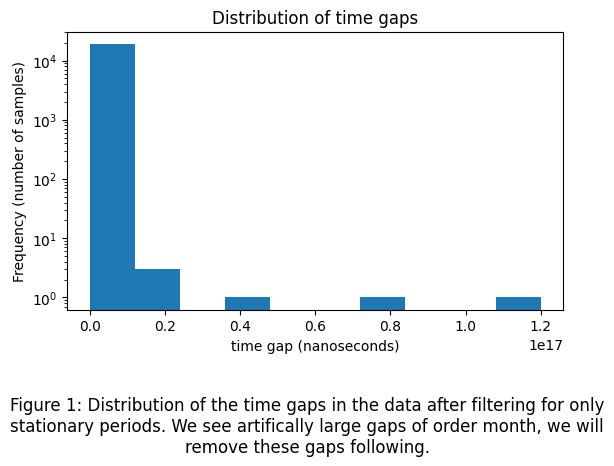

In [94]:
ax = eqGoodData.gaps.plot(kind="hist", logy=True)
ax.set_xlabel("time gap (nanoseconds)")
ax.set_ylabel("Frequency (number of samples)")
ax.set_title("Distribution of time gaps")
plt.subplots_adjust(bottom=0.3)
plt.figtext(0.5, 0.01, "Figure 1: Distribution of the time gaps in the data after filtering for only stationary periods. We see artifically large gaps of order month, we will remove these gaps following.", wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

 By removing some sections of the data to use only stationary periods we created some artificially large gaps: gaps of order ~month.

 Remove all gaps that are larger than about a month and visualize:

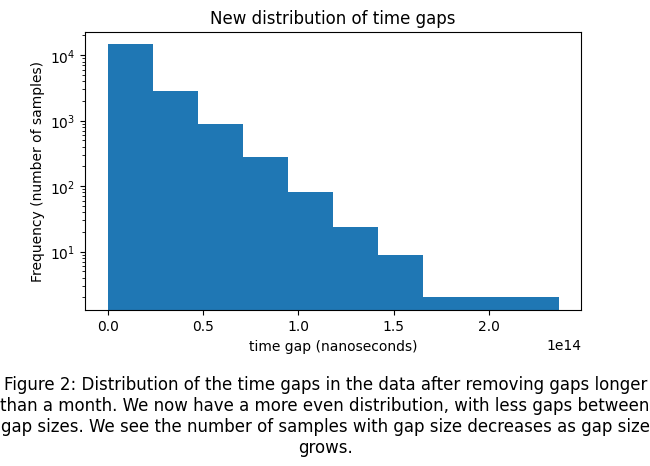

In [95]:
# 2.628e15 nanoseconds in a month
month_time = 2.628e+15
eqGoodData = eqGoodData[eqGoodData.gaps < month_time]
ax = eqGoodData.gaps.plot(kind="hist", logy=True)
ax.set_xlabel("time gap (nanoseconds)")
ax.set_ylabel("Frequency (number of samples)")
ax.set_title("New distribution of time gaps")
plt.subplots_adjust(bottom=0.3)
plt.figtext(0.5, 0.01, "Figure 2: Distribution of the time gaps in the data after removing gaps longer than a month. We now have a more even distribution, with less gaps between gap sizes. We see the number of samples with gap size decreases as gap size grows.", wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

# data analysis

### (not in paper) Choose a p-value (=$\alpha$ thresold: variable ```alpha```) of 3-$\sigma$.

Here we follow the instructions (algorithm) in **Section 3 paragraph 3** and compare the results with the results in table 1 with a threshold  of = 0.01 and 0.001

We do it for all 5 magnitude thresholds as indicated in the paper (and in Table 1).

Note that the x axis in plot Fig 1 is in _log space_. Use ```np.log10()``` to take the logarithm of the time gaps.

m_threshold=0.01, M1=2.0, M2=2.5, KS-Stat=0.016, P-value=0.247
m_threshold=0.01, M1=2.0, M2=3.0, KS-Stat=0.024, P-value=0.477
m_threshold=0.01, M1=2.0, M2=3.5, KS-Stat=0.037, P-value=0.692
m_threshold=0.01, M1=2.0, M2=4.0, KS-Stat=0.093, P-value=0.313
m_threshold=0.01, M1=2.5, M2=3.0, KS-Stat=0.030, P-value=0.321
m_threshold=0.01, M1=2.5, M2=3.5, KS-Stat=0.048, P-value=0.402
m_threshold=0.01, M1=2.5, M2=4.0, KS-Stat=0.105, P-value=0.195
m_threshold=0.01, M1=3.0, M2=3.5, KS-Stat=0.046, P-value=0.576
m_threshold=0.01, M1=3.0, M2=4.0, KS-Stat=0.085, P-value=0.470
m_threshold=0.01, M1=3.5, M2=4.0, KS-Stat=0.092, P-value=0.476
m_threshold=0.001, M1=2.0, M2=2.5, KS-Stat=0.021, P-value=0.049
m_threshold=0.001, M1=2.0, M2=3.0, KS-Stat=0.027, P-value=0.290
m_threshold=0.001, M1=2.0, M2=3.5, KS-Stat=0.050, P-value=0.273
m_threshold=0.001, M1=2.0, M2=4.0, KS-Stat=0.077, P-value=0.499
m_threshold=0.001, M1=2.5, M2=3.0, KS-Stat=0.024, P-value=0.511
m_threshold=0.001, M1=2.5, M2=3.5, KS-Stat=0.035, 

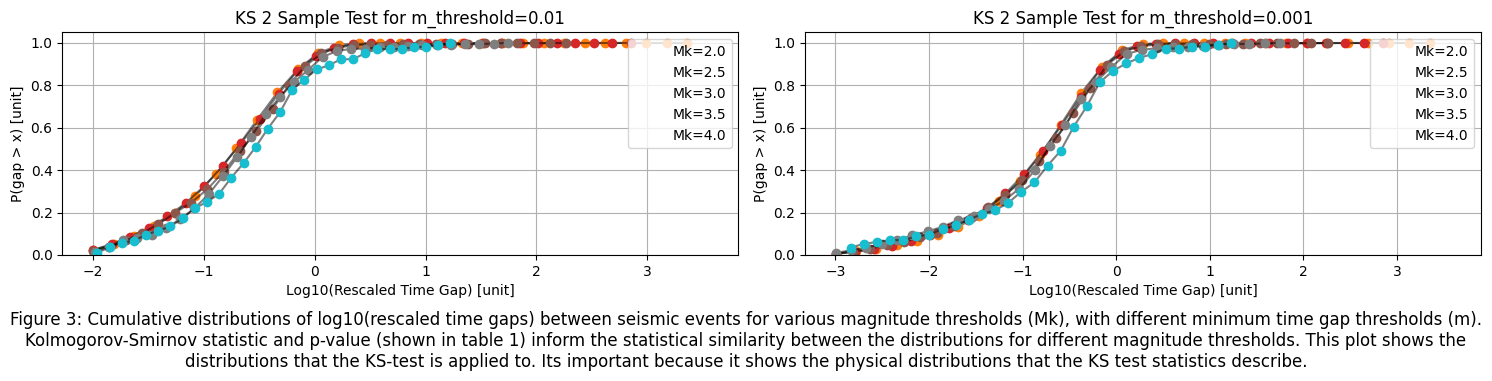

In [96]:
def dataAnalysis(dataframe, magnitudes, m_thresholds=[0.01, 0.001]):
    fig, axes = plt.subplots(1, len(m_thresholds), figsize=(15, 4), sharey=False)

    for i, m_threshold in enumerate(m_thresholds):
        rescaled_times = []
        for Mk in magnitudes:
            x_Mk = dataframe['datetime'][dataframe['mag'] >= Mk].diff().values[1:].astype(float)
            for _ in range(2):
                Rk = 1 / np.mean(x_Mk)
                x_Mk = x_Mk[Rk * x_Mk > m_threshold] * Rk

            rescaled_times.append(np.log10(x_Mk))
            hs, bins, _ = axes[i].hist(rescaled_times[-1], bins=30,
                                       cumulative=True, histtype='step',
                                       density=True, label=f'Mk={Mk}', alpha=0)

            axes[i].plot(bins[:-1], hs, 'k-', alpha=0.5)
            axes[i].plot(bins[:-1], hs, 'o')

        for a in range(len(rescaled_times)):
            for b in range(a + 1, len(rescaled_times)):
                ks_stat, p_value = ks_2samp(rescaled_times[a], rescaled_times[b])
                print(f"m_threshold={m_threshold}, M1={magnitudes[a]}, M2={magnitudes[b]}, KS-Stat={ks_stat:.3f}, P-value={p_value:.3f}")

        axes[i].legend(loc='upper right')
        axes[i].set_title(f'KS 2 Sample Test for m_threshold={m_threshold}', fontsize=12)
        axes[i].set_xlabel('Log10(Rescaled Time Gap) [unit]', fontsize=10)
        axes[i].set_ylabel('P(gap > x) [unit]', fontsize=10)
        axes[i].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.subplots_adjust(bottom=0.3)
    plt.figtext(0.5, 0.01, ("Figure 3: Cumulative distributions of log10(rescaled time gaps) "
                            "between seismic events for various magnitude thresholds (Mk), with different minimum time gap thresholds (m). "
                            "Kolmogorov-Smirnov statistic and p-value (shown in table 1) inform the statistical similarity between the "
                            "distributions for different magnitude thresholds. This plot shows the distributions that the KS-test is applied to. "
                            "Its important because it shows the physical distributions that the KS test statistics describe."),
              ha="center", fontsize=12, va='bottom', wrap=True)

dataAnalysis(eqGoodData, [2.0, 2.5, 3.0, 3.5, 4.0])


| m = 0.01   |  N    |  2.0  |  2.5  |  3.0  |  3.5  |  4.0  |
|-----|-------|-------|-------|-------|-------|-------|
|M >= 2.0 | 17441 |   -   | 24.7% | 47.7% | 69.2% | 31.3% |
|M >= 2.5 |  5186 | 0.016 |   -   | 32.1% | 40.2% | 19.5% |
|M >= 3.0 |  1291 | 0.024 | 0.030 |   -   | 57.6% | 47.0% |
|M >= 3.5 |   364 | 0.037 | 0.048 | 0.046 |   -   | 47.6% |
|M >= 4.0 |   104 | 0.093 | 0.105 | 0.085 | 0.092 |   -   |

| m = 0.001   |  N    |  2.0  |  2.5  |  3.0  |  3.5  |  4.0  |
|-----|-------|-------|-------|-------|-------|-------|
|M >= 2.0 | 18553 |   -   |  4.9% | 29.0% | 27.3% | 49.9% |
|M >= 2.5 |  5566 | 0.021 |   -   | 51.1% | 72.1% | 31.3% |
|M >= 3.0 |  1398 | 0.027 | 0.024 |   -   | 73.4% | 63.5% |
|M >= 3.5 |   405 | 0.050 | 0.035 | 0.038 |   -   | 47.0% |
|M >= 4.0 |   114 | 0.077 | 0.090 | 0.071 | 0.088 |   -   |


Table 1: KS statistic d below the diagonal and corresponding p-value, above the diagonal, as a percentage, for rescaled inter-event-time distributions with lower cutoffs m = 0.01 (top) and 0.001 (bottom). Based on the data, with a alpha-threshold of 3, the scaling hypothesis cannot be rejected. To reject the hypothesis, we would need to see a p value below 0.03%


Based on the analysis, we cannot say there is statistical significant differences between the distributions with 3 sigma. The paper also did not find evidence of statistical significance. In both the paper and here, we cannot reject the null hypothesis that the distribution of samples is of the same parent distribution for time gaps of different magnitues. The resulting data is not identical, the table values are slighlty different, due to differences in the dataset and potentially preprocessing. The paper was not totally clear in every signle step, not fully reproducible, thus the numbers are slightly off, but the final result in the NHRT framework remains the same.



**How could you _force_ a significant result?**


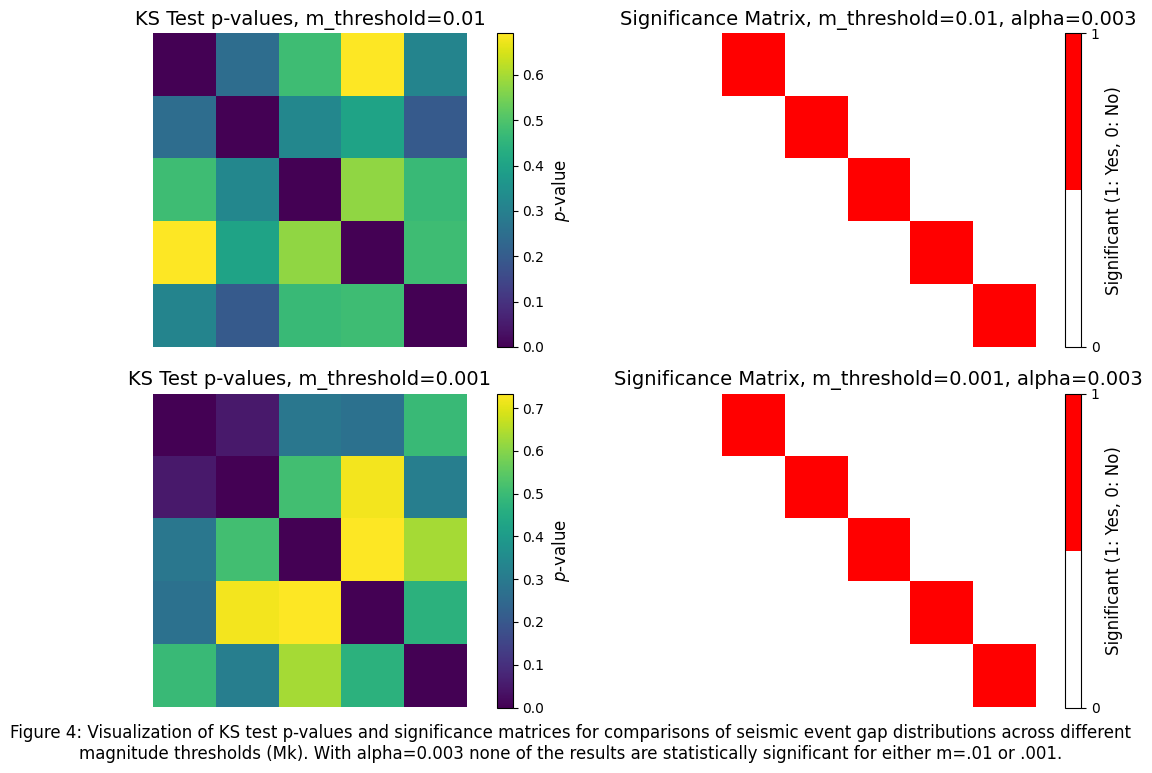

In [97]:
from matplotlib import colors
# First, matrix
def visualize_pvalues(dataframe, magnitudes, m_thresholds=[0.01, 0.001], alpha=0.003, fignum=4):
    fig, axes = plt.subplots(len(m_thresholds), 2, figsize=(12, 8))

    for i, m_threshold in enumerate(m_thresholds):
        p_values_matrix = np.zeros((len(magnitudes), len(magnitudes)))

        rescaled_times = []
        for Mk in magnitudes:
            x_Mk = dataframe['datetime'][dataframe['mag'] >= Mk].diff().values[1:].astype(float)
            for _ in range(2):
                Rk = 1 / np.mean(x_Mk)
                x_Mk = x_Mk[Rk * x_Mk > m_threshold] * Rk

            rescaled_times.append(np.log10(x_Mk))

        for a in range(len(rescaled_times)):
            for b in range(a + 1, len(rescaled_times)):
                _, p_value = ks_2samp(rescaled_times[a], rescaled_times[b])
                p_values_matrix[a, b] = p_value
                p_values_matrix[b, a] = p_value

        im = axes[i, 0].imshow(p_values_matrix, cmap='viridis', interpolation='none')
        axes[i, 0].axis('off')
        cb = plt.colorbar(im, ax=axes[i, 0])
        cb.ax.set_ylabel(r'$p$-value', fontsize=12)
        axes[i, 0].set_title(f"KS Test p-values, m_threshold={m_threshold}", fontsize=14)

        significant = (p_values_matrix < alpha).astype(int)

        cmap_binary = colors.ListedColormap(['white', 'red'])

        im = axes[i, 1].imshow(significant, cmap=cmap_binary, interpolation='none')
        axes[i, 1].axis('off')
        cb = plt.colorbar(im, ax=axes[i, 1], ticks=[0, 1])
        cb.ax.set_ylabel('Significant (1: Yes, 0: No)', fontsize=12)
        axes[i, 1].set_title(f"Significance Matrix, m_threshold={m_threshold}, alpha={alpha}", fontsize=14)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.figtext(0.5, -0.01, (f"Figure {fignum}: Visualization of KS test p-values and significance matrices for comparisons "
                            "of seismic event gap distributions across different magnitude thresholds (Mk). With alpha=0.003"
                            " none of the results are statistically significant for either m=.01 or .001."),
              ha="center", fontsize=12, va='bottom', wrap=True)

visualize_pvalues(eqGoodData, [2.0, 2.5, 3.0, 3.5, 4.0])

You should never change your significance threshold once you pick it because its unethical to change your requirements to validate your own hypothesis. If you have a set confidence level, you must stick by that, if the results do not reach that confidence level, you cant just lower your confidence level and then say hey my theory is good now!

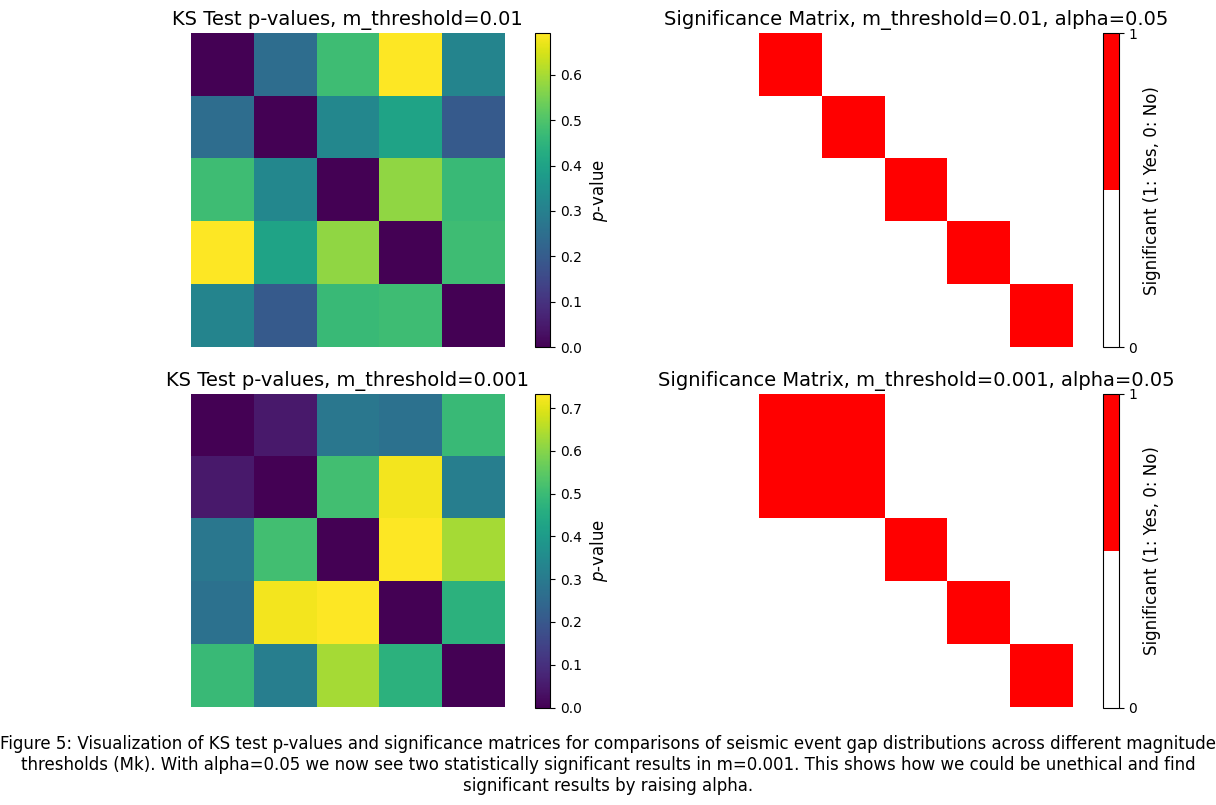

In [98]:
# Matrix + lower threshold - had to redefine for caption only...
def visualize_pvalues(dataframe, magnitudes, m_thresholds=[0.01, 0.001], alpha=0.003, fignum=5):
    fig, axes = plt.subplots(len(m_thresholds), 2, figsize=(12, 8))

    for i, m_threshold in enumerate(m_thresholds):
        p_values_matrix = np.zeros((len(magnitudes), len(magnitudes)))

        rescaled_times = []
        for Mk in magnitudes:
            x_Mk = dataframe['datetime'][dataframe['mag'] >= Mk].diff().values[1:].astype(float)
            for _ in range(2):
                Rk = 1 / np.mean(x_Mk)
                x_Mk = x_Mk[Rk * x_Mk > m_threshold] * Rk

            rescaled_times.append(np.log10(x_Mk))

        for a in range(len(rescaled_times)):
            for b in range(a + 1, len(rescaled_times)):
                _, p_value = ks_2samp(rescaled_times[a], rescaled_times[b])
                p_values_matrix[a, b] = p_value
                p_values_matrix[b, a] = p_value

        im = axes[i, 0].imshow(p_values_matrix, cmap='viridis', interpolation='none')
        axes[i, 0].axis('off')
        cb = plt.colorbar(im, ax=axes[i, 0])
        cb.ax.set_ylabel(r'$p$-value', fontsize=12)
        axes[i, 0].set_title(f"KS Test p-values, m_threshold={m_threshold}", fontsize=14)

        significant = (p_values_matrix < alpha).astype(int)

        cmap_binary = colors.ListedColormap(['white', 'red'])

        im = axes[i, 1].imshow(significant, cmap=cmap_binary, interpolation='none')
        axes[i, 1].axis('off')
        cb = plt.colorbar(im, ax=axes[i, 1], ticks=[0, 1])
        cb.ax.set_ylabel('Significant (1: Yes, 0: No)', fontsize=12)
        axes[i, 1].set_title(f"Significance Matrix, m_threshold={m_threshold}, alpha={alpha}", fontsize=14)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.figtext(0.5, -0.05, (f"Figure {fignum}: Visualization of KS test p-values and significance matrices for comparisons "
                            "of seismic event gap distributions across different magnitude thresholds (Mk). With alpha=0.05"
                            " we now see two statistically significant results in m=0.001. This shows how we could be unethical and find significant results"
                            " by raising alpha."),
              ha="center", fontsize=12, va='bottom', wrap=True)


visualize_pvalues(eqGoodData, [2.0, 2.5, 3.0, 3.5, 4.0], alpha=.05)


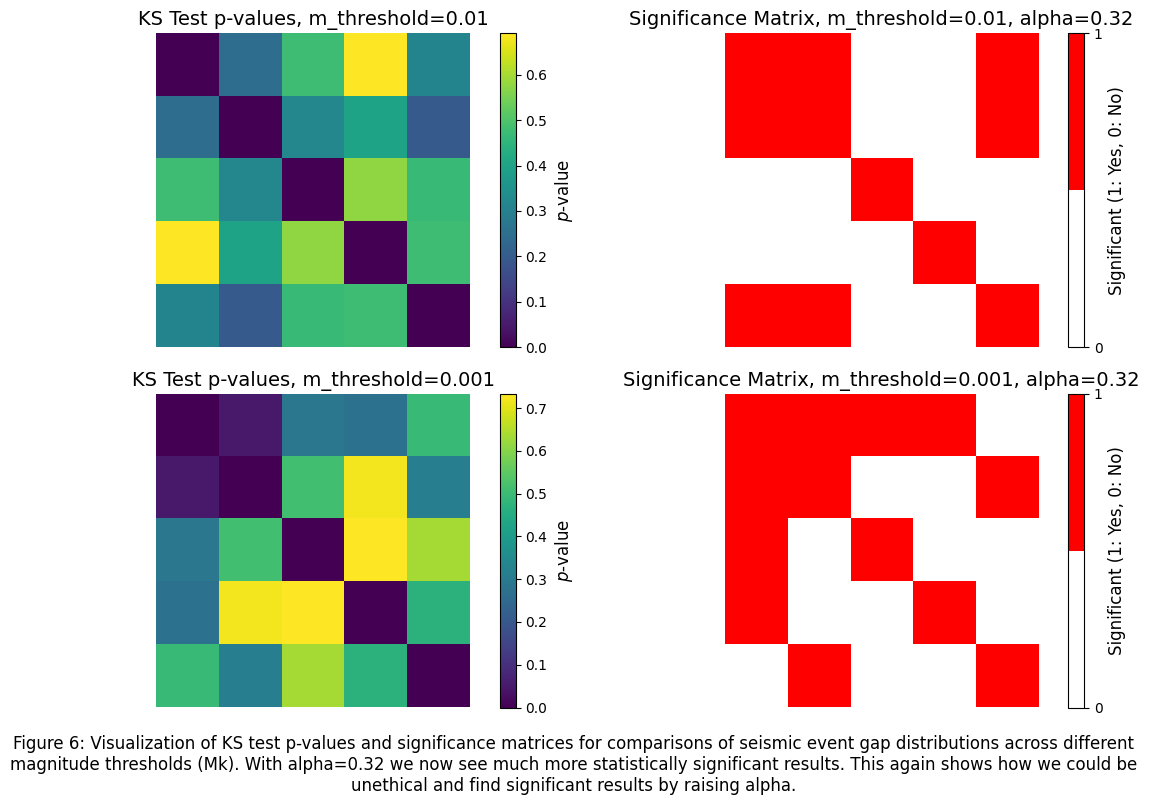

In [99]:
def visualize_pvalues(dataframe, magnitudes, m_thresholds=[0.01, 0.001], alpha=0.003, fignum=6):
    fig, axes = plt.subplots(len(m_thresholds), 2, figsize=(12, 8))

    for i, m_threshold in enumerate(m_thresholds):
        p_values_matrix = np.zeros((len(magnitudes), len(magnitudes)))

        rescaled_times = []
        for Mk in magnitudes:
            x_Mk = dataframe['datetime'][dataframe['mag'] >= Mk].diff().values[1:].astype(float)
            for _ in range(2):
                Rk = 1 / np.mean(x_Mk)
                x_Mk = x_Mk[Rk * x_Mk > m_threshold] * Rk

            rescaled_times.append(np.log10(x_Mk))

        for a in range(len(rescaled_times)):
            for b in range(a + 1, len(rescaled_times)):
                _, p_value = ks_2samp(rescaled_times[a], rescaled_times[b])
                p_values_matrix[a, b] = p_value
                p_values_matrix[b, a] = p_value

        im = axes[i, 0].imshow(p_values_matrix, cmap='viridis', interpolation='none')
        axes[i, 0].axis('off')
        cb = plt.colorbar(im, ax=axes[i, 0])
        cb.ax.set_ylabel(r'$p$-value', fontsize=12)
        axes[i, 0].set_title(f"KS Test p-values, m_threshold={m_threshold}", fontsize=14)

        significant = (p_values_matrix < alpha).astype(int)

        cmap_binary = colors.ListedColormap(['white', 'red'])

        im = axes[i, 1].imshow(significant, cmap=cmap_binary, interpolation='none')
        axes[i, 1].axis('off')
        cb = plt.colorbar(im, ax=axes[i, 1], ticks=[0, 1])
        cb.ax.set_ylabel('Significant (1: Yes, 0: No)', fontsize=12)
        axes[i, 1].set_title(f"Significance Matrix, m_threshold={m_threshold}, alpha={alpha}", fontsize=14)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.figtext(0.5, -0.05, (f"Figure {fignum}: Visualization of KS test p-values and significance matrices for comparisons "
                            "of seismic event gap distributions across different magnitude thresholds (Mk). With alpha=0.32"
                            " we now see much more statistically significant results. This again shows how we could be unethical and find significant results"
                            " by raising alpha."),
              ha="center", fontsize=12, va='bottom', wrap=True)


visualize_pvalues(eqGoodData, [2.0, 2.5, 3.0, 3.5, 4.0], alpha=.32)
